In [1]:
import pandas as pd # type: ignore
from IPython.display import display # type: ignore

# Cargar el archivo Excel
archivo_excel = r'C:\Users\USUARIO\Desktop\nuevo\BD3.xlsx'
Data1 = pd.read_excel(archivo_excel)

# Mostrar las primeras filas del DataFrame
display(Data1.head())

,N°,name,IUPAC_name,SMILES,CID,logBB,BBB+/BBB-,Inchi,threshold,reference,group,comments
0,1,sulphasalazine,2-hydroxy-5-[[4-(pyridin-2-ylsulfamoyl)phenyl]...,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,5339.0,-2.69,BBB-,InChI=1S/C18H14N4O5S/c23-16-9-6-13(11-15(16)18...,NaN,R2|R2|R25|R46|,A,NaN
1,2,moxalactam,7-[[2-carboxy-2-(4-hydroxyphenyl)acetyl]amino]...,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,3889.0,-2.52,BBB-,InChI=1S/C20H20N6O9S/c1-25-19(22-23-24-25)36-8...,NaN,R25|,A,NaN
2,3,clioquinol,5-chloro-7-iodoquinolin-8-ol,Oc1c(I)cc(Cl)c2cccnc12,2788.0,-2.40,BBB-,InChI=1S/C9H5ClINO/c10-6-4-7(11)9(13)8-5(6)2-1...,NaN,R18|R26|R27|,A,NaN
3,4,bbcpd11 (cimetidine analog) (y-g13),2-[2-[(3-bromopyridin-2-yl)methylsulfanyl]ethy...,CCNC(=NCCSCc1ncccc1Br)NC#N,14022517.0,-2.15,BBB-,InChI=1S/C12H16BrN5S/c1-2-15-12(18-9-14)17-6-7...,NaN,R2|R2|R8|R40|R2|R2|R2|R2|R18|R21|R25|R25|R26|R...,A,NaN
4,5,schembl614298,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-7-hydro...",CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,18595497.0,-2.15,BBB-,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-4-12(25)2...,NaN,R25|,A,NaN


In [2]:

"""
Exploración y Resumen de Propiedades Moleculares.
"""

import numpy as np # type: ignore


# Número de filas y columnas
num_rows, num_columns = Data1.shape
print(f"Dimensiones del conjunto de datos: {num_rows} filas x {num_columns} columnas\n")

# Nombres de las variables con descripciones
variable_descriptions = {
    'N°': 'Número de identificación',
    'name': 'Nombre de la Molecula',
    'IUPAC_name': 'Nombre según la Unión Internacional de Química Pura y Aplicada (IUPAC)',
    'SMILES': 'Simplified Molecular Input Line Entry System (SMILES)',
    'CID': 'Chemical Identifier',
    'logBB': 'Coeficiente de partición octanol-agua (logBB)',
    'BBB+/BBB-': 'Barrera hematoencefálica (BBB) Atravieza/No atravieza ',
    'Inchi': 'Clave internacional normalizada de la InChI (IUPAC International Chemical Identifier)',
    'threshold': 'Umbral',
    'reference': 'Referencia temporal',
    'group': 'Grupo al que pertenece la molecula',
    'comments': 'Comentarios'
}

# Imprimir nombres de las variables con descripciones
print("Nombres de las variables con descripciones:")
for column in Data1.columns:
    print(f" - {column}: {variable_descriptions.get(column, 'Descripción no proporcionada')}")

# Tipos de datos de las variables
data_types = Data1.dtypes
print("\nTipos de datos de las variables:")
for column, dtype in data_types.items():
    print(f" - {column}: {dtype}")

# Datos nulos por variable
missing_data = Data1.isnull().sum()
print("\nDatos nulos por variable:")
for column, missing_count in missing_data.items():
    if missing_count > 0:
        print(f" - {column}: {missing_count} valores nulos")
    else:
        print(f" - {column}: No hay valores nulos")



Dimensiones del conjunto de datos: 7807 filas x 12 columnas

Nombres de las variables con descripciones:
 - N°: Número de identificación
 - name: Nombre de la Molecula
 - IUPAC_name: Nombre según la Unión Internacional de Química Pura y Aplicada (IUPAC)
 - SMILES: Simplified Molecular Input Line Entry System (SMILES)
 - CID: Chemical Identifier
 - logBB: Coeficiente de partición octanol-agua (logBB)
 - BBB+/BBB-: Barrera hematoencefálica (BBB) Atravieza/No atravieza 
 - Inchi: Clave internacional normalizada de la InChI (IUPAC International Chemical Identifier)
 - threshold: Umbral
 - reference: Referencia temporal
 - group: Grupo al que pertenece la molecula
 - comments: Comentarios

Tipos de datos de las variables:
 - N°: int64
 - name: object
 - IUPAC_name: object
 - SMILES: object
 - CID: float64
 - logBB: float64
 - BBB+/BBB-: object
 - Inchi: object
 - threshold: float64
 - reference: object
 - group: object
 - comments: object

Datos nulos por variable:
 - N°: No hay valores nul

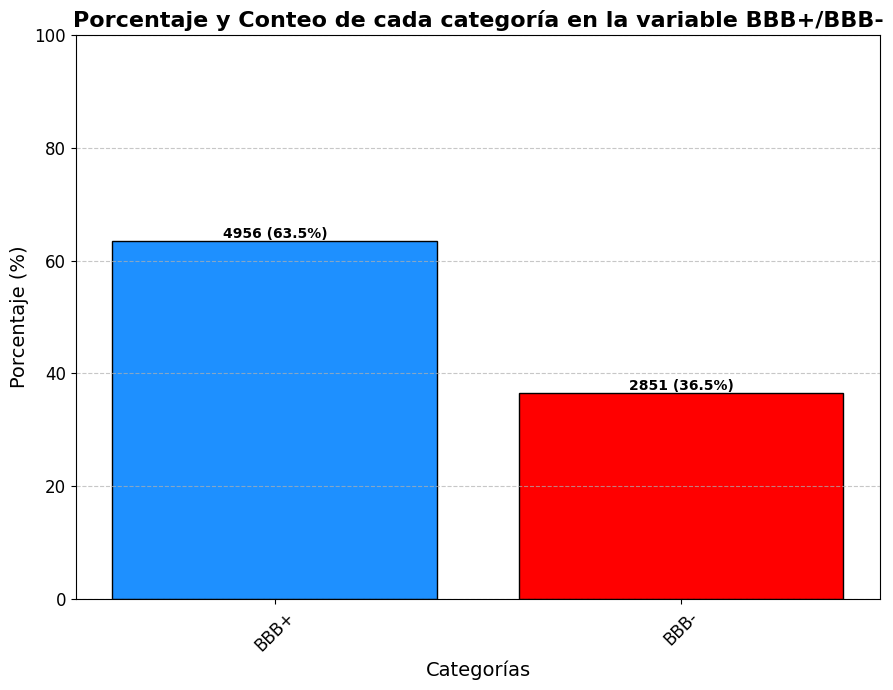

In [3]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

# Contar las ocurrencias de cada categoría en la variable 'BBB+/BBB-'
conteo = Data1['BBB+/BBB-'].value_counts()

# Calcular los porcentajes
porcentajes = (conteo / conteo.sum()) * 100

# Crear el gráfico de barras
plt.figure(figsize=(9, 7)) # type: ignore
colors = ['#1E90FF', '#FF0000']  # Azul y rojo
bars = plt.bar(conteo.index, porcentajes.values, color=colors, edgecolor='Black') # type: ignore

# Añadir los valores numéricos y porcentajes encima de cada barra
for i, bar in enumerate(bars):
    yval = bar.get_height()
    count = conteo.iloc[i]  
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{count} ({yval:.1f}%)', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black') # type: ignore

# Configurar el gráfico
plt.title('Porcentaje y Conteo de cada categoría en la variable BBB+/BBB-', fontsize=16, fontweight='bold') # type: ignore
plt.xlabel('Categorías', fontsize=14) # type: ignore
plt.ylabel('Porcentaje (%)', fontsize=14) # type: ignore
plt.xticks(rotation=45, fontsize=12)  
plt.yticks(fontsize=12)  
plt.ylim(0, 100)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir un fondo de color
plt.gca().set_facecolor('#FFFFFF')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


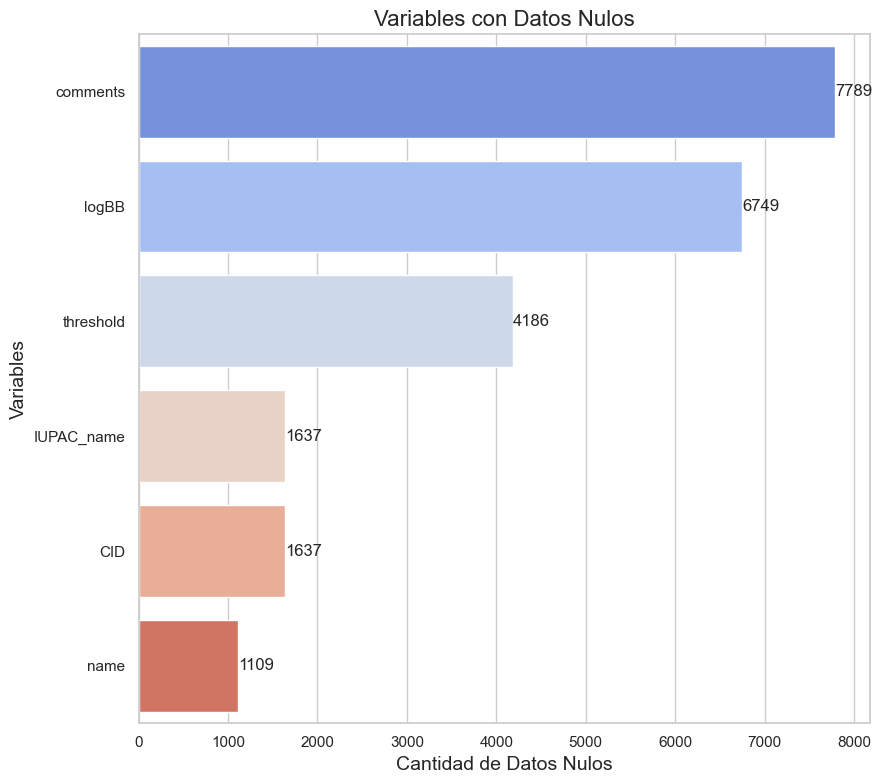

In [4]:
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
import warnings

# Suprimir advertencias futuras
warnings.simplefilter(action='ignore', category=FutureWarning)

# Configurar estilo de Seaborn
sns.set(style="whitegrid")

# Contar los datos nulos por variable
missing_data = Data1.isnull().sum()

# Filtrar para mostrar solo las variables que tienen datos nulos
missing_data = missing_data[missing_data > 0]

# Ordenar los datos nulos en orden descendente
missing_data = missing_data.sort_values(ascending=False)

# Visualizar los datos nulos en forma de gráfico de barras horizontales
plt.figure(figsize=(9, 8))  

# Cambiar la paleta a tonos de azul y rojos bajos, con más colores
palette = sns.color_palette("coolwarm", len(missing_data))  

sns.barplot(x=missing_data.values, y=missing_data.index, palette=palette, orient='h')
plt.title('Variables con Datos Nulos', fontsize=16)
plt.xlabel('Cantidad de Datos Nulos', fontsize=14)
plt.ylabel('Variables', fontsize=14)

# Agregar el texto con la cantidad de datos nulos en cada barra
for index, value in enumerate(missing_data):
    plt.text(value + 0.5, index, str(value), ha='left', va='center', fontsize=12)

plt.tight_layout()
plt.show()

In [5]:
from rdkit import Chem # type: ignore
import sys

# Función para validar los SMILES y filtrar las moléculas válidas
def validar_smiles(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return False
        Chem.SanitizeMol(mol)
        return True
    except:
        return False

# Aplicar la función para validar los SMILES y crear una columna 'SMILES_validos' en el DataFrame
Data1['SMILES_validos'] = Data1['SMILES'].apply(validar_smiles)

# Filtrar las moléculas válidas y experimentadas (que pasan BBB)
mol_validas_experimentadas = Data1[Data1['SMILES_validos'] & (Data1['BBB+/BBB-'] == 'BBB+')]

# Filtrar las moléculas válidas pero no experimentadas (que no pasan BBB)
mol_validas_no_experimentadas = Data1[Data1['SMILES_validos'] & (Data1['BBB+/BBB-'] == 'BBB-')]

# Calcular el número total de moléculas
total_moleculas = len(Data1)

# Calcular el número total de moléculas válidas y experimentadas
total_validas_experimentadas = len(mol_validas_experimentadas)

# Calcular el número total de moléculas válidas pero no experimentadas
total_validas_no_experimentadas = len(mol_validas_no_experimentadas)

# Mostrar resumen
print("Resumen del análisis de permeabilidad de las moléculas:")
print("------------------------------------------------------")
print("Total de moléculas:", total_moleculas)
print("Moléculas válidas y experimentadas (pasan BBB):", total_validas_experimentadas)
print("Moléculas válidas pero no experimentadas (no pasan BBB):", total_validas_no_experimentadas)

Resumen del análisis de permeabilidad de las moléculas:
------------------------------------------------------
Total de moléculas: 7807
Moléculas válidas y experimentadas (pasan BBB): 4956
Moléculas válidas pero no experimentadas (no pasan BBB): 2851


In [6]:
import pandas as pd  # type: ignore
from rdkit import Chem, RDLogger  # type: ignore
from chembl_structure_pipeline.standardizer import (  # type: ignore
    get_parent_mol, update_mol_valences, kekulize_mol, flatten_tartrate_mol,
    normalize_mol, uncharge_mol, cleanup_drawing_mol)
from tqdm import tqdm  # type: ignore

# Suprimir mensajes de RDKit
RDLogger.DisableLog('rdApp.*')

"""
Descripción sobre el uso de chembl_structure_pipeline:

El módulo 'chembl_structure_pipeline' se utiliza para estandarizar estructuras moleculares
representadas en formato SMILES. La estandarización es un paso crucial en el análisis químico,
ya que garantiza que las representaciones moleculares sean consistentes y comparables.

Las funciones específicas utilizadas en este código son:

- get_parent_mol: Esta función obtiene la estructura parental de una molécula, eliminando grupos funcionales no esenciales.
- update_mol_valences: Ajusta las valencias de los átomos en la molécula para asegurar que sean químicamente correctas.
- kekulize_mol: Convierte estructuras aromáticas a su forma Kekulé, asegurando que los enlaces sean representados correctamente.
- flatten_tartrate_mol: Aplana estructuras complejas de tartratos a una forma más simple.
- normalize_mol: Normaliza la estructura molecular para asegurar consistencia en la representación.
- uncharge_mol: Elimina cargas formales de los átomos en la molécula.
- cleanup_drawing_mol: Limpia la representación visual de la molécula para facilitar su visualización.

En conjunto, estas funciones permiten obtener una representación SMILES estandarizada que es esencial para
realizar análisis químicos precisos y comparativos.
"""

# Funciones de estandarización
def standardize_molecule(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return None
        mol = get_parent_mol(mol)
        mol = update_mol_valences(mol)
        mol = kekulize_mol(mol)
        mol = flatten_tartrate_mol(mol)
        mol = normalize_mol(mol)
        mol = uncharge_mol(mol)
        mol = cleanup_drawing_mol(mol)
        return Chem.MolToSmiles(mol, isomericSmiles=True)
    except Exception:
        return None

# Función para limpiar el DataFrame
def clean_molecules(df):
    problematic_smiles = []

    for idx, row in tqdm(df.iterrows(), total=df.shape[0], desc="Standardizing molecules"):
        smiles = row['SMILES']
        standardized_smiles_str = standardize_molecule(smiles)
        if standardized_smiles_str and standardized_smiles_str != smiles:
            problematic_smiles.append((smiles, standardized_smiles_str))

    problematic_df = pd.DataFrame(problematic_smiles, columns=['Original_SMILES', 'Standardized_SMILES'])
    return problematic_df

# Verificar que el DataFrame esté cargado
try:
    # Usamos el DataFrame ya cargado llamado Data1
    Data1_copy = Data1.copy()  # Crear una copia para evitar alterar el original

    # Limpiar las moléculas con problemas en la copia del DataFrame
    problematic_data = clean_molecules(Data1_copy)
    
    # Validar si hay problemas y almacenar el resultado en una variable
    has_problematic_molecules = not problematic_data.empty

except Exception as e:
    has_problematic_molecules = True  # Si ocurre un error, se considera que hay problemas

# En lugar de imprimir, solo establecer una variable que indique si hay problemas
print(f"Data1 has problematic molecules: {has_problematic_molecules}")

[08:34:05] Initializing Normalizer
Standardizing molecules: 100%|██████████| 7807/7807 [00:40<00:00, 193.85it/s]

Data1 has problematic molecules: False


### Título: Evaluación y Clasificación de Tipos de SMILES 


En la gestión de datos químicos, la estandarización de las representaciones SMILES (Simplified Molecular Input Line Entry System) es fundamental para asegurar la consistencia y fiabilidad en el análisis molecular. Estandarizar a un solo formato, ya sea canónico o isomérico, es crucial por varias razones:

1.  Consistencia en el Análisis: Utilizar un solo tipo de SMILES asegura que todas las moléculas se representen de manera uniforme, evitando confusiones y errores al comparar estructuras. Los SMILES isoméricos pueden reflejar la estereoquímica, mientras que los canónicos no, lo que puede llevar a resultados inconsistentes si ambos formatos se mezclan en un mismo análisis.

2. Eficiencia en el Procesamiento de Datos: Estandarizar a un formato reduce la carga de procesamiento y facilita la aplicación de herramientas de análisis, que en su mayoría están optimizadas para trabajar con un solo tipo de SMILES. Esto agiliza el cálculo de descriptores moleculares y el entrenamiento de modelos de predicción.

3. Mejor Comparabilidad: Al mantener un formato único, se mejora la comparabilidad de los datos, ya que no habrá discrepancias debidas a las diferentes representaciones de una misma molécula. En lugar de generar diferentes SMILES para cada isómero, estandarizar permite una comparación más clara y precisa entre las moléculas en el conjunto de datos.

Por estas razones, estandarizar los SMILES a un formato, ya sea canónico o isomérico, es clave para asegurar la calidad y fiabilidad de los datos en estudios de predicción molecular.

In [7]:
from rdkit import Chem  # type: ignore
import pandas as pd  # type: ignore

def clasificar_smiles(smiles):
    """
    Clasifica una cadena SMILES en tres categorías:
    - "Canónico": Si el SMILES coincide con su representación canónica.
    - "Isomérico": Si el SMILES coincide con su representación isomérica.
    - "No estándar": Si no coincide con ninguna de las anteriores.
    
    Args:
        smiles (str): Cadena SMILES a clasificar.
        
    Returns:
        str: Tipo de SMILES clasificado.
    """
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return "Inválido"
        
        # Generar SMILES canónico
        can_smiles = Chem.MolToSmiles(mol, isomericSmiles=False, canonical=True)
        
        # Generar SMILES isomérico
        iso_smiles = Chem.MolToSmiles(mol, isomericSmiles=True, canonical=True)
        
        # Clasificación de SMILES
        if smiles == can_smiles:
            return "Canónico"
        elif smiles == iso_smiles:
            return "Isomérico"
        else:
            return "No estándar"  # Para otros casos que no sean canónicos o isoméricos
    except Exception:
        return "Inválido"  # Manejo de errores en caso de un SMILES inválido

# Verificar la cantidad inicial de SMILES en el DataFrame
total_smiles_inicial = len(Data1)
print(f"Cantidad inicial de SMILES: {total_smiles_inicial}")

# Aplicar la función para clasificar los SMILES en el DataFrame
Data1['Tipo_SMILES'] = Data1['SMILES'].apply(clasificar_smiles)

# Contar los tipos de SMILES
conteo_tipos = Data1['Tipo_SMILES'].value_counts()

# Calcular el porcentaje de cada tipo de SMILES
porcentaje_tipos = (conteo_tipos / total_smiles_inicial) * 100

# Crear un DataFrame para mostrar la información de manera clara
resultado = pd.DataFrame({
    'Cantidad': conteo_tipos,
    'Porcentaje': porcentaje_tipos
}).reset_index().rename(columns={'index': 'Tipo_SMILES'})

# Mostrar los resultados en forma de tabla
print("\nClasificación de SMILES:")
print(resultado)

# Conclusiones
print("\nConclusiones:")
print(f"Se procesaron un total de {total_smiles_inicial} SMILES.")
print("La clasificación ha permitido identificar las diferentes representaciones como Canónicos e Isoméricos.")

Cantidad inicial de SMILES: 7807

Clasificación de SMILES:
   Tipo_SMILES  Cantidad  Porcentaje
0    Isomérico      4129   52.888433
1     Canónico      3294   42.192904
2  No estándar       384    4.918663

Conclusiones:
Se procesaron un total de 7807 SMILES.
La clasificación ha permitido identificar las diferentes representaciones como Canónicos e Isoméricos.


In [8]:
from rdkit import Chem  # type: ignore
import pandas as pd  # type: ignore

def clasificar_smiles(smiles):
    """
    Clasifica una cadena SMILES en tres categorías:
    - "Canónico": Si el SMILES coincide con su representación canónica.
    - "Isomérico": Si el SMILES coincide con su representación isomérica.
    - "No estándar": Si no coincide con ninguna de las anteriores.
    
    Args:
        smiles (str): Cadena SMILES a clasificar.
        
    Returns:
        str: Tipo de SMILES clasificado.
    """
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return "Inválido"
        
        # Generar SMILES canónico
        can_smiles = Chem.MolToSmiles(mol, isomericSmiles=False, canonical=True)
        
        # Generar SMILES isomérico
        iso_smiles = Chem.MolToSmiles(mol, isomericSmiles=True, canonical=True)
        
        # Clasificación de SMILES
        if smiles == can_smiles:
            return "Canónico"
        elif smiles == iso_smiles:
            return "Isomérico"
        else:
            return "No estándar"  # Para otros casos que no sean canónicos o isoméricos
    except Exception:
        return "Inválido"  # Manejo de errores en caso de un SMILES inválido

# Aplicar la función para clasificar los SMILES en el DataFrame
Data1['Tipo_SMILES'] = Data1['SMILES'].apply(clasificar_smiles)

# Filtrar los SMILES que son clasificados como 'No estándar'
no_estandar_df = Data1[Data1['Tipo_SMILES'] == 'No estándar']

# Verificar la cantidad de SMILES No Estándar
cantidad_no_estandar = no_estandar_df.shape[0]
print(f"Cantidad de SMILES No Estándar: {cantidad_no_estandar}")

# Mostrar los primeros 10 ejemplos de SMILES No Estándar
if cantidad_no_estandar > 0:
    print("\nEjemplos de SMILES No Estándar:")
    print(no_estandar_df[['SMILES', 'Tipo_SMILES']].head(10))  # Muestra los primeros 10 ejemplos

# Opcionalmente, puedes guardar estos resultados en un archivo CSV para un análisis más profundo
no_estandar_df.to_csv('smiles_no_estandar.csv', index=False)

Cantidad de SMILES No Estándar: 384

Ejemplos de SMILES No Estándar:
                                                SMILES  Tipo_SMILES
26   OC[C@H]1O[C@H](O[C@]2(CO)O[C@H](CO)[C@@H](O)[C...  No estándar
96   C[C@H]1O[C@@H](O[C@H]2[C@@H](O)C[C@H](O[C@H]3[...  No estándar
157  C[C@]12CC(=O)[C@H]3[C@@H](CCC4=CC(=O)C=C[C@@]4...  No estándar
262  CC(=O)OC1C(=O)[C@]2(C)[C@@H](O)C[C@H]3OCC3(OC(...  No estándar
332      NC(=O)[C@@H]1c2ccccc2[C@@H]2O[C@@H]2c2ccccc21  No estándar
348  CC1(C)SSC(C)(C)[C@@H](C(=O)O)NC(=O)C(Cc2ccccc2...  No estándar
392  C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)CC[C@@...  No estándar
393  C[C@]12C[C@H](O)[C@H]3[C@H](CCC4=CC(=O)CC[C@@]...  No estándar
420  C[C@]12CC(O)[C@H]3[C@@H](CCC4=CC(=O)C=C[C@@]43...  No estándar
421  C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)C=C[C@...  No estándar


In [9]:
from rdkit import Chem  # type: ignore
import pandas as pd  # type: ignore

#  Escogencia de Variable de 'Data1' columna 'SMILES'
Data1['Tipo_SMILES'] = Data1['SMILES'].apply(clasificar_smiles)

# Filtrar los SMILES No Estándar
no_estandar_df = Data1[Data1['Tipo_SMILES'] == 'No estándar']

# Validar químicamente los SMILES No Estándar
def validar_smiles(smiles):
    """Devuelve True si el SMILES es válido, False si no lo es."""
    mol = Chem.MolFromSmiles(smiles)
    return mol is not None

no_estandar_df['Es_Valido'] = no_estandar_df['SMILES'].apply(validar_smiles)

# Contar cuántos son válidos e inválidos
cantidad_validos = no_estandar_df[no_estandar_df['Es_Valido'] == True].shape[0]
cantidad_invalidos = no_estandar_df[no_estandar_df['Es_Valido'] == False].shape[0]

# Mostrar resultados
print(f"Cantidad de SMILES No Estándar Válidos: {cantidad_validos}")
print(f"Cantidad de SMILES No Estándar Inválidos: {cantidad_invalidos}")

# Clasificación adicional según BBB+ y BBB-
cantidad_bbb_positivo = no_estandar_df[no_estandar_df['BBB+/BBB-'] == 'BBB+'].shape[0]
cantidad_bbb_negativo = no_estandar_df[no_estandar_df['BBB+/BBB-'] == 'BBB-'].shape[0]

print(f"Cantidad de SMILES No Estándar relacionados con BBB+: {cantidad_bbb_positivo}")
print(f"Cantidad de SMILES No Estándar relacionados con BBB-: {cantidad_bbb_negativo}")

Cantidad de SMILES No Estándar Válidos: 384
Cantidad de SMILES No Estándar Inválidos: 0
Cantidad de SMILES No Estándar relacionados con BBB+: 176
Cantidad de SMILES No Estándar relacionados con BBB-: 208


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_6728\1094414119.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_estandar_df['Es_Valido'] = no_estandar_df['SMILES'].apply(validar_smiles)


In [10]:
import pandas as pd
from rdkit import Chem  # type: ignore
import mols2grid

"""
Este script filtra los SMILES clasificados como 'No estándar' para realizar un análisis visual.
Se calculará la longitud de cada SMILES y se visualizarán las estructuras moleculares.
Esto permitirá evaluar la complejidad de las moléculas y observar su distribución,
ayudando a identificar si las cadenas más largas están asociadas con problemas en su clasificación.
"""

# Filtrar los SMILES que son clasificados como 'No estándar'
no_estandar_df = Data1[Data1['Tipo_SMILES'] == 'No estándar'].copy()  

# Convertir SMILES a moléculas RDKit y agregar al DataFrame usando .loc[]
no_estandar_df.loc[:, 'mol'] = no_estandar_df['SMILES'].apply(Chem.MolFromSmiles)

# Seleccionar 40 SMILES aleatorios de los no estándar
muestra_no_estandar = no_estandar_df.sample(n=384, random_state=1)  

# Visualizar usando mols2grid
mols2grid.display(muestra_no_estandar, smiles_col='SMILES', mol_col='mol')

MolGridWidget()

In [11]:
"""Considerando la información proporcionada sobre los registros de CID, nombres IUPAC, y su clasificación como isoméricos o canónicos: 
El análisis de los 7807 SMILES en la base de datos revela que 384 de ellos son clasificados como no estándar, 
lo que indica que no pudieron ser reconocidos como isoméricos o canónicos debido a diversos factores estructurales o de representación. Estos SMILES no estándar incluyen registros detallados
 como el CID, el nombre IUPAC y la clave InChI, lo que proporciona información valiosa sobre su identidad química. Sin embargo, a pesar de contar con esta información, 
 la complejidad estructural y las variaciones en la representación pueden haber impedido su clasificación adecuada. Por ejemplo, se identificaron 4956 moléculas válidas
que atraviesan la barrera hematoencefálica (BBB+) y 2851 que no lo hacen (BBB-), sugiriendo que las características estructurales juegan un papel crucial en su permeabilidad. 
Además, el conteo de combinaciones específicas de elementos químicos en los SMILES muestra la presencia de halógenos y grupos funcionales relevantes, lo que podría influir en sus 
propiedades bioquímicas y farmacológicas. Este estudio destaca la importancia de una representación precisa y estandarizada en la química computacional para facilitar 
el análisis y la predicción de propiedades moleculares. 
"""
import pandas as pd
from collections import Counter

# Concatenar todos los SMILES en una sola cadena
all_smiles = ' '.join(no_estandar_df['SMILES'].dropna())  # Ignorar valores nulos

# Función para contar combinaciones de n caracteres
def count_combinations(text, n):
    return Counter(text[i:i+n] for i in range(len(text) - n + 1))

# Contar combinaciones de 2 y 3 caracteres (bigramas y trigramas)
bigram_counts = count_combinations(all_smiles, 2)
trigram_counts = count_combinations(all_smiles, 3)

# Buscar combinaciones específicas en los conteos
def search_combinations(counter, queries):
    return {query: counter.get(query, 0) for query in queries}

# Combinaciones específicas a buscar
specific_combinations = ['Br', 'Cl', 'F', 'I', 'N+', 'OH']

# Mostrar las combinaciones más comunes
print("Combinaciones de 2 caracteres más comunes:")
for combo, count in bigram_counts.most_common(20):
    print(f'{combo}: {count}')

print("\nCombinaciones de 3 caracteres más comunes:")
for combo, count in trigram_counts.most_common(20):
    print(f'{combo}: {count}')

# Mostrar conteo de combinaciones específicas
print("\nConteo de combinaciones específicas:")
specific_counts = search_combinations(bigram_counts, specific_combinations)
for combo, count in specific_counts.items():
    print(f'{combo}: {count}')

Combinaciones de 2 caracteres más comunes:
[C: 3139
C@: 3139
H]: 2751
@H: 2735
@@: 1613
O): 1591
](: 1454
)[: 1136
(C: 1116
CC: 1009
)C: 955
C(: 954
C[: 915
C): 875
(O: 833
=O: 781
(=: 715
cc: 658
]1: 636
]2: 521

Combinaciones de 3 caracteres más comunes:
[C@: 3139
@H]: 2735
C@@: 1612
H](: 1408
@@H: 1390
C@H: 1345
)[C: 1134
C[C: 910
=O): 773
(=O: 700
C(=: 665
](O: 643
(C): 642
O)[: 556
(O): 538
H]1: 529
](C: 513
O[C: 506
O)C: 474
H]2: 415

Conteo de combinaciones específicas:
Br: 8
Cl: 106
F: 0
I: 0
N+: 10
OH: 0


* Considerando la información proporcionada sobre los registros de CID, nombres IUPAC, y su clasificación como isoméricos o canónicos: El análisis de los 7807 SMILES en la base de datos revela que 384 de ellos son clasificados como no estándar, lo que indica que no pudieron ser reconocidos como isoméricos o canónicos debido a diversos factores estructurales o de representación. Estos SMILES no estándar incluyen registros detallados como el CID, el nombre IUPAC y la clave InChI, lo que proporciona información valiosa sobre su identidad química. Sin embargo, a pesar de contar con esta información, la complejidad estructural y las variaciones en la representación pueden haber impedido su clasificación adecuada. Por ejemplo, se identificaron 4956 moléculas válidas que atraviesan la barrera hematoencefálica (BBB+) y 2851 que no lo hacen (BBB-), sugiriendo que las características estructurales juegan un papel crucial en su permeabilidad. Además, el conteo de combinaciones específicas de elementos químicos en los SMILES muestra la presencia de halógenos y grupos funcionales relevantes, lo que podría influir en sus propiedades bioquímicas y farmacológicas. Este estudio destaca la importancia de una representación precisa y estandarizada en la química computacional para facilitar el análisis y la predicción de propiedades moleculares. Este párrafo sintetiza los hallazgos clave y proporciona un contexto sobre por qué ciertos SMILES no se clasifican adecuadamente

In [12]:
import pandas as pd # type: ignore
from rdkit import Chem # type: ignore
from rdkit.Chem import AllChem # type: ignore
from chembl_structure_pipeline.standardizer import ( # type: ignore
    get_parent_mol, update_mol_valences, kekulize_mol, normalize_mol, uncharge_mol
)
from chembl_structure_pipeline.exclude_flag import exclude_flag # type: ignore

metal_atoms = {3, 4, 11, 12, 13, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
               29, 30, 31, 32, 34, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
               47, 48, 49, 50, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
               66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
               81, 82, 83, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98,
               99, 100, 101, 102, 103}
heavy_atoms = {21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34,
               37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
               50, 51, 52, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
               65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
               78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90,
               91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102,
               103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
               114, 115, 116, 117, 118}

unwanted_atom_dict = {
    "metal_atoms": metal_atoms,
    "heavy_atoms": heavy_atoms,
}

def skip_problematic_molecules(df, smi_column="SMILES", output_column="SMILES_fixed"):
    for idx, row in df.iterrows():
        try:
            mol = Chem.MolFromSmiles(row[smi_column])
            if mol is not None and mol.GetNumAtoms() != 0:
                df.loc[idx, output_column] = Chem.MolToSmiles(mol, canonical=True)
            else:
                df.loc[idx, output_column] = ""
        except:
            df.loc[idx, output_column] = ""
    
    df = df[df[output_column] != ""]
    return df.reset_index(drop=True)

def filter_restricted_atoms(df, unwanted_atoms="heavy_atoms", smi_column="SMILES_fixed"):
    unwanted_atom_set = unwanted_atom_dict.get(unwanted_atoms)
    for idx, row in df.iterrows():
        if row[smi_column] != "":
            try:
                mol = Chem.MolFromSmiles(row[smi_column])
                atom_list = [atom.GetAtomicNum() for atom in mol.GetAtoms()]
                if not set(atom_list).isdisjoint(unwanted_atom_set):
                    df.loc[idx, smi_column] = ""
            except AttributeError:
                continue
    
    df = df[df[smi_column] != ""]
    return df.reset_index(drop=True)

def handle_solvents_salts(df, smi_column="SMILES_fixed"):
    for idx, row in df.iterrows():
        if row[smi_column] != "":
            mol = Chem.MolFromSmiles(row[smi_column])
            mol_new, _ = get_parent_mol(mol, neutralize=False, check_exclusion=True, verbose=False)
            df.loc[idx, smi_column] = Chem.MolToSmiles(mol_new, canonical=True)
    
    df = df[df[smi_column] != ""]
    return df.reset_index(drop=True)

def standardize_molecules(df, smi_column="SMILES_fixed"):
    for idx, row in df.iterrows():
        if row[smi_column] != "":
            mol = Chem.MolFromSmiles(row[smi_column])
            if not exclude_flag(mol, includeRDKitSanitization=False):
                mol = update_mol_valences(mol)
                mol = kekulize_mol(mol)
                mol = normalize_mol(mol)
                mol = uncharge_mol(mol)
                df.loc[idx, smi_column] = Chem.MolToSmiles(mol, canonical=True)
    
    df = df[df[smi_column] != ""]
    return df.reset_index(drop=True)

def neutralize_charges(smiles):
    reactions = [
        ('[n+;H]', 'n'),
        ('[N+;!H0]', 'N'),
        ('[$([O-]);!$([O-][#7])]', 'O'),
        ('[S-;X1]', 'S'),
        ('[$([N-;X2]S(=O)=O)]', 'N'),
        ('[$([N-;X2][C,N]=C)]', 'N'),
        ('[n-]', '[nH]'),
        ('[$([S-]=O)]', 'S'),
        ('[$([N-]C=O)]', 'N'),
    ]
    reactions = [(Chem.MolFromSmarts(x), Chem.MolFromSmiles(y, False)) for x, y in reactions]
    
    mol = Chem.MolFromSmiles(smiles)
    replaced = False
    for reactant, product in reactions:
        while mol.HasSubstructMatch(reactant):
            replaced = True
            rms = AllChem.ReplaceSubstructs(mol, reactant, product)
            mol = rms[0]
    if replaced:
        return Chem.MolToSmiles(mol, True)
    else:
        return smiles

def neutralize(df, smi_column="SMILES_fixed"):
    df[smi_column] = df[smi_column].apply(neutralize_charges)
    return df

def clean_molecules(df, unwanted_atoms="heavy_atoms"):
    df["SMILES_fixed"] = ""
    df = skip_problematic_molecules(df)
    df = handle_solvents_salts(df)
    df = neutralize(df)
    df = filter_restricted_atoms(df, unwanted_atoms)
    df = standardize_molecules(df)
    df = skip_problematic_molecules(df, smi_column="SMILES_fixed", output_column="SMILES_final")
    
    # Ordenar el resultado (ajuste esto según las columnas de su DataFrame)
    if "BBB+/BBB-" in df.columns and "CID" in df.columns:
        df = df.sort_values(by=["BBB+/BBB-", "SMILES_final", "CID"])
    
    return df

# Asumiendo que Data1 es su DataFrame
Data1 = clean_molecules(Data1)

# Guardar el resultado (ajuste el nombre del archivo según sus necesidades)
Data1.to_excel("Data1_cleaned.xlsx", index=None, engine="openpyxl")

print("Moléculas originales:", len(Data1))
print("Moléculas después de la limpieza:", len(Data1[Data1["SMILES_final"] != ""]))

Moléculas originales: 7807
Moléculas después de la limpieza: 7807


Documentación de la Operación de Limpieza de Datos

La operación de limpieza de datos es un proceso fundamental en el análisis de datos que implica la detección, corrección y eliminación de datos erróneos o irrelevantes. En este caso, se ha implementado un pipeline para limpiar y estandarizar estructuras químicas representadas como cadenas SMILES en un DataFrame utilizando la biblioteca pandas y herramientas específicas para manipulación química.

* Procesamiento de Cadenas SMILES: Se implementó una función que procesa cada cadena SMILES para neutralizar las cargas presentes en las moléculas. Esta función utiliza un conjunto definido de reacciones químicas para reemplazar subestructuras con cargas por sus equivalentes neutros. Si se realizan cambios durante este proceso, se devuelve la cadena SMILES procesada; si no, se retorna la cadena original.
* Filtrado de Átomos No Deseados: Otra función se encarga de filtrar las moléculas que contienen átomos no deseados, como metales o átomos pesados. Esta función verifica cada molécula en el DataFrame y, si encuentra un átomo restringido, reemplaza la cadena SMILES correspondiente por una cadena vacía. Esto garantiza que solo se conserven las moléculas que cumplen con los criterios establecidos.
* Estandarización de Moléculas: La estandarización es un paso crucial para asegurar que todas las estructuras químicas estén en un formato consistente. Para ello, se aplica una serie de transformaciones a cada cadena SMILES válida, incluyendo la actualización de valencias, la kekulización, la normalización y la neutralización de cargas. Este proceso asegura que las moléculas sean químicamente válidas y adecuadas para análisis posteriores.

* Limpieza y Estandarización del DataFrame: Finalmente, se implementó una función que orquesta todo el proceso de limpieza del DataFrame. Inicializa una columna para almacenar las cadenas SMILES procesadas y ejecuta una serie de pasos que incluyen el filtrado de moléculas problemáticas, el manejo de solventes y sales, la neutralización de cargas y la estandarización final. Al finalizar, el DataFrame se ordena según criterios específicos si ciertas columnas están presentes.

NOTA

* Este pipeline proporciona un enfoque sistemático para limpiar y estandarizar estructuras químicas representadas en formato SMILES. La limpieza adecuada de los datos es esencial para garantizar resultados precisos en cualquier análisis posterior o modelado predictivo. Al aplicar estas transformaciones, se mejora significativamente la calidad y utilidad de los datos químicos. Si necesitas realizar ajustes adicionales o agregar más detalles específicos sobre algún aspecto del proceso, ¡no dudes en decírmelo!

In [13]:
import pandas as pd
from rdkit import Chem

# Función para convertir SMILES a formato isomérico
def convert_to_isomeric_smiles(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            # Convertir a formato isomérico
            return Chem.MolToSmiles(mol, isomericSmiles=True)
        else:
            return ""
    except:
        return ""

# Aplicar la conversión en la columna de SMILES original y actualizar
def standardize_smiles_to_isomeric(df, smi_column="SMILES"):
    df[smi_column] = df[smi_column].apply(convert_to_isomeric_smiles)
    return df

# Ejemplo de uso:
Data1 = standardize_smiles_to_isomeric(Data1, smi_column="SMILES")

# Guardar el resultado en un nuevo archivo si es necesario
Data1.to_excel("Data1_isomeric_cleaned.xlsx", index=None, engine="openpyxl")

print("Estandarización completada. Todas las moléculas ahora están en formato isomérico.")


Estandarización completada. Todas las moléculas ahora están en formato isomérico.


In [14]:
# Verificar el número total de SMILES antes y después de la conversión
total_smiles = len(Data1)  # Número total de SMILES en la base de datos
smiles_vacios = Data1["SMILES"].isnull().sum()  # Cuenta cuántos SMILES están vacíos
smiles_validos = total_smiles - smiles_vacios  # SMILES válidos después de la conversión

# Mostrar la información
print(f"Total de SMILES: {total_smiles}")
print(f"Total de SMILES válidos después de la conversión: {smiles_validos}")
print(f"Total de SMILES vacíos después de la conversión: {smiles_vacios}")

# Si quieres ver los SMILES vacíos o que fallaron en la conversión
smiles_fallidos = Data1[Data1["SMILES"] == ""]
print(f"SMILES fallidos:\n{smiles_fallidos}")


Total de SMILES: 7807
Total de SMILES válidos después de la conversión: 7807
Total de SMILES vacíos después de la conversión: 0
SMILES fallidos:
Empty DataFrame
Columns: [N°, name, IUPAC_name, SMILES, CID, logBB, BBB+/BBB-, Inchi, threshold, reference, group, comments, SMILES_validos, Tipo_SMILES, SMILES_fixed, SMILES_final]
Index: []


In [16]:
# Verificar duplicados en la columna de SMILES
duplicados = Data1[Data1.duplicated(subset=["SMILES"], keep=False)]  # Muestra todos los duplicados

# Contar el número total de duplicados
total_duplicados = Data1.duplicated(subset=["SMILES"]).sum()
total_unicos = len(Data1) - total_duplicados  # Número de SMILES únicos

# Mostrar la información
print(f"Total de SMILES: {len(Data1)}")
print(f"Total de SMILES únicos: {total_unicos}")
print(f"Total de SMILES duplicados: {total_duplicados}")

# ver algunos ejemplos de SMILES duplicados si existen
if not duplicados.empty:
    print("Ejemplos de SMILES duplicados:")
    print(duplicados.head(10))  # Muestra los primeros 10 duplicados
else:
    print("No hay SMILES duplicados.")

Total de SMILES: 7807
Total de SMILES únicos: 7807
Total de SMILES duplicados: 0
No hay SMILES duplicados.


In [17]:
import pandas as pd # type: ignore

def check_nulls(df):
    # Contar los valores nulos en cada columna
    null_counts = df.isnull().sum()
    
    # Filtrar las columnas que tienen valores nulos
    null_columns = null_counts[null_counts > 0]
    
    if len(null_columns) > 0:
        print("Columnas con valores nulos y sus respectivas cantidades:")
        for column, count in null_columns.items():
            print(f"Columna: {column}, Valores nulos: {count}")
    else:
        print("No hay valores nulos en el DataFrame.")

# Verificación de Nulos en el DataFrame Data1
check_nulls(Data1)


Columnas con valores nulos y sus respectivas cantidades:
Columna: name, Valores nulos: 1109
Columna: IUPAC_name, Valores nulos: 1637
Columna: CID, Valores nulos: 1637
Columna: logBB, Valores nulos: 6749
Columna: threshold, Valores nulos: 4186
Columna: comments, Valores nulos: 7789


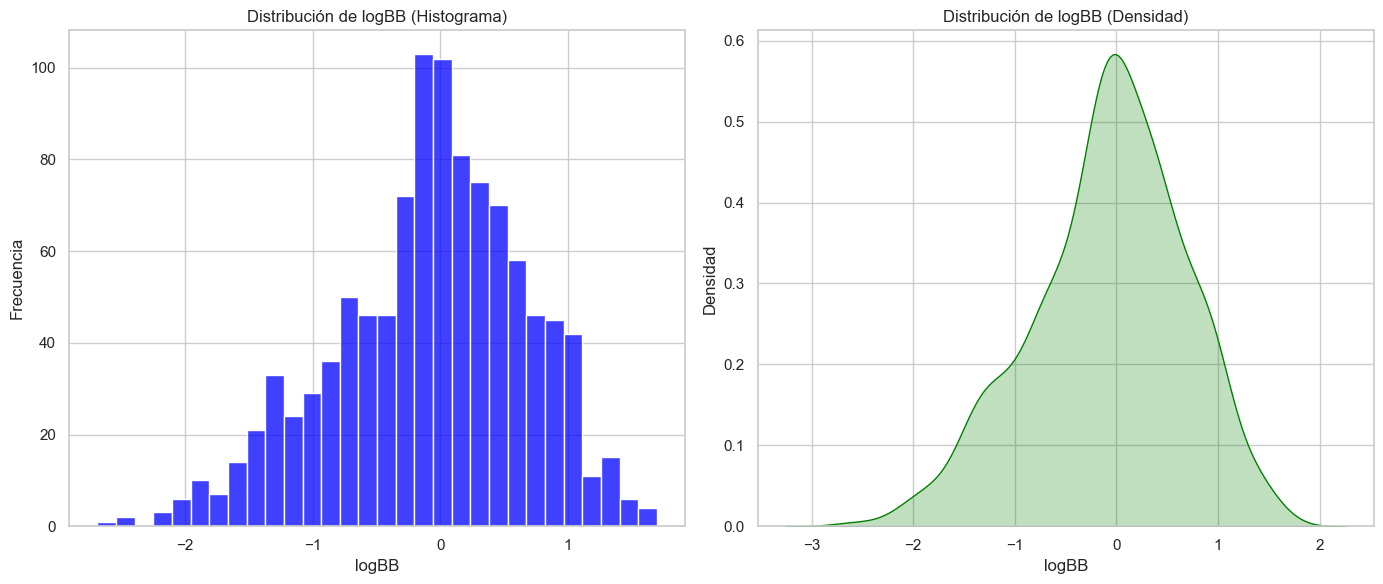

In [18]:
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear una figura con dos subplots
plt.figure(figsize=(14, 6))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(Data1['logBB'].dropna(), bins=30, kde=False, color='blue')
plt.title('Distribución de logBB (Histograma)')
plt.xlabel('logBB')
plt.ylabel('Frecuencia')

# Gráfico de densidad
plt.subplot(1, 2, 2)
sns.kdeplot(Data1['logBB'].dropna(), shade=True, color='green')
plt.title('Distribución de logBB (Densidad)')
plt.xlabel('logBB')
plt.ylabel('Densidad')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


In [19]:
# Obtener estadísticas descriptivas
stats = Data1.groupby('BBB+/BBB-')['logBB'].describe()
print(stats)


           count      mean       std   min   25%    50%     75%   max
BBB+/BBB-                                                            
BBB+       930.0  0.110860  0.577206 -1.00 -0.29  0.075  0.5075  1.70
BBB-       128.0 -1.449141  0.329777 -2.69 -1.57 -1.375 -1.2300 -1.01


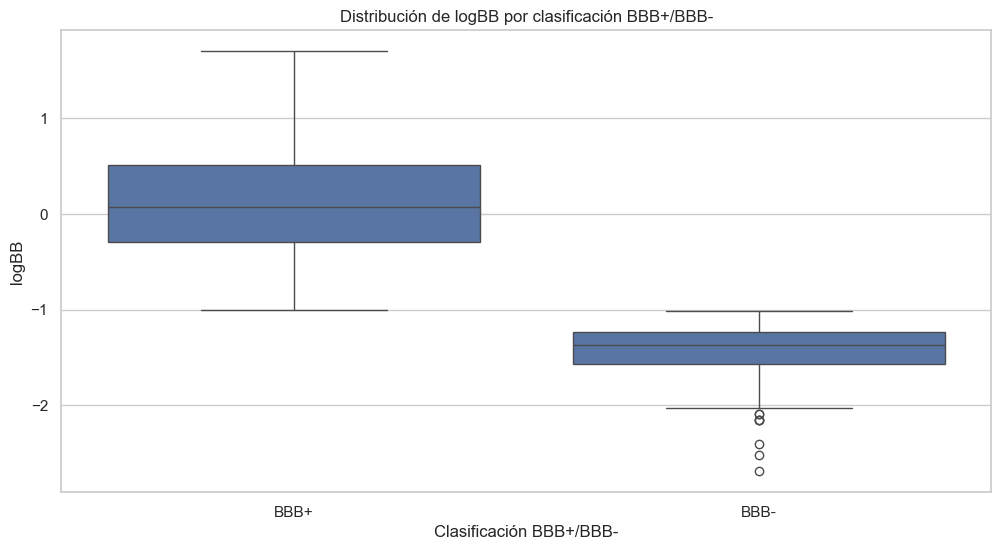

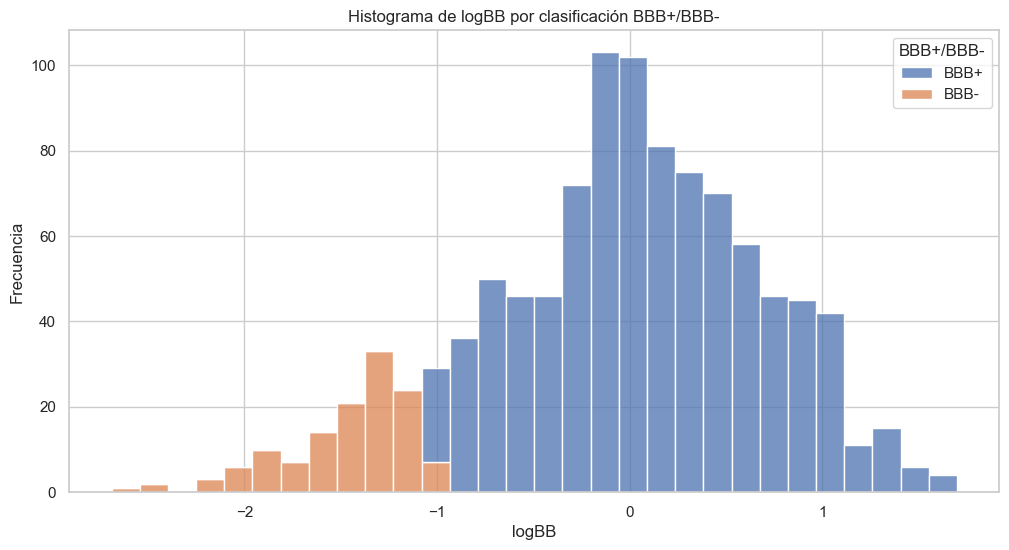

In [20]:
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

# Boxplot para la distribución de logBB
plt.figure(figsize=(12, 6))
sns.boxplot(x='BBB+/BBB-', y='logBB', data=Data1)
plt.title('Distribución de logBB por clasificación BBB+/BBB-')
plt.xlabel('Clasificación BBB+/BBB-')
plt.ylabel('logBB')
plt.show()

# Histograma de logBB para cada clasificación
plt.figure(figsize=(12, 6))
sns.histplot(data=Data1, x='logBB', hue='BBB+/BBB-', multiple='stack', bins=30)
plt.title('Histograma de logBB por clasificación BBB+/BBB-')
plt.xlabel('logBB')
plt.ylabel('Frecuencia')
plt.show()


* Debido a la gran cantidad de datos nulos en la columna de logBB, que asciende a 6749 valores nulos de un total de 7807 moléculas, es importante señalar que estos datos solo pueden obtenerse mediante análisis experimentales en el laboratorio. La ausencia de valores en logBB limita el análisis y la interpretación de la permeabilidad de las moléculas a través de la barrera hematoencefálica, lo que resalta la necesidad de realizar estudios experimentales para obtener información precisa y completa.

In [21]:
from rdkit import Chem # type: ignore
from rdkit.Chem import Crippen # type: ignore

# Función para calcular LogP y manejar casos especiales
def calculate_logP(smiles):
    """
    Calcula el LogP (coeficiente de partición octanol-agua) para una molécula 
    basada en su cadena SMILES.
    
    Dado que los datos de LogBB (coeficiente de partición cerebro-sangre) no 
    están disponibles, el LogP se utiliza como un indicador alternativo de 
    lipofilia. El LogP ayuda a inferir la capacidad de las moléculas para 
    atravesar la barrera hematoencefálica (BBB), proporcionando una aproximación 
    práctica en ausencia de datos experimentales directos.
    """
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        try:
            logP = Crippen.MolLogP(mol)
            return logP
        except Exception as e:
            print(f"Error calculando LogP para {smiles}: {e}")
            return None
    else:
        print(f"SMILES inválido: {smiles}")
        return None

# Aplicar el cálculo de LogP a cada molécula en la columna SMILES
Data1['LogP'] = Data1['SMILES'].apply(calculate_logP)

# Mostrar algunos resultados para verificar
print(Data1[['SMILES', 'LogP']].head(10))

# Guardar el DataFrame actualizado en un nuevo archivo Excel
ruta_archivo_actualizado = "Data1_con_LogP.xlsx"  # Cambia este nombre si es necesario
Data1.to_excel(ruta_archivo_actualizado, index=False)

print("Cálculo de LogP completado y guardado en el archivo.")

                                         SMILES    LogP
1058                                  BrC(Br)Br  2.4547
5440                Brc1c(NC2=NCCN2)ccc2nccnc12  1.7634
853               Brc1cc(Br)c(NC2=NCCN2)c(Br)c1  3.3452
738                     Brc1cccc(Br)c1NC1=NCCN1  2.5827
544                                           C  0.6361
1059                               C#CC(C)(O)CC  0.7806
1060                         C#CC(O)(/C=C/Cl)CC  1.5132
4105                           C#CC(O)(C=CCl)CC  1.5132
1061                      C#CC(OC(N)=O)c1ccccc1  1.4562
780   C#CC1(O)CCC2C3C(C)CC4=C(CCC(=O)C4)C3CCC21  3.4925
Cálculo de LogP completado y guardado en el archivo.


* Ante la limitación de datos nulos en la columna de logBB, que presenta 6749 valores nulos, se ha decidido calcular el logP como alternativa. A diferencia de logBB, los valores de logP pueden obtenerse a través de métodos de química computacional, lo que permite enriquecer la base de datos con información valiosa sobre la lipofilicidad de las moléculas. Este enfoque no solo optimiza el uso de los datos disponibles, sino que también facilita una mejor evaluación de la permeabilidad a través de la barrera hematoencefálica.

* En la presente investigación, la elección de calcular LogP en lugar de LogBB se debe a la limitación en la disponibilidad de datos de LogBB para un número significativo de moléculas en la base de datos. El LogBB es un parámetro específico que mide la distribución de una molécula entre la sangre y el cerebro, y su disponibilidad puede ser limitada debido a la falta de estudios experimentales específicos para muchas moléculas.

* Dado que el LogP es una medida indirecta de la lipofilia de una molécula, que influye en su capacidad para atravesar membranas biológicas, su cálculo proporciona una aproximación útil en ausencia de datos directos de LogBB. La lipofilia, medida por el LogP, es un factor importante en la determinación de la capacidad de una molécula para cruzar la BBB, ya que las moléculas más lipofílicas tienden a tener una mayor probabilidad de atravesar la barrera.

* Por lo tanto, al calcular el LogP para las moléculas, se obtiene un parámetro relevante que puede servir como sustituto aproximado en la ausencia de datos experimentales de LogBB, facilitando la realización de análisis y la toma de decisiones en la investigación de permeabilidad de moléculas.

Esta metodología permite avanzar en el estudio y la evaluación de moléculas con potencial para aplicaciones terapéuticas, proporcionando un valor predictivo que complementa el análisis existente en el contexto de la investigación sobre la barrera hematoencefálica.

In [23]:
# Instalar dependencias
%pip install mordred rdkit

  Using cached mordred-1.2.0.tar.gz (128 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached networkx-2.8.8-py3-none-any.whl.metadata (5.1 kB)
Using cached networkx-2.8.8-py3-none-any.whl (2.0 MB)
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176752 sha256=041364a28f0d267a30a646e0afdea3c50b121cdf63e273d9eb99e3e5b38554c0
  Stored in directory: c:\users\usuario\appdata\local\pip\cache\wheels\a7\4f\b8\d4c6591f6ac944aaced7865b349477695f662388ad958743c7
Successfully built mordred
Note: you may need to restart the kernel to use updated packages.


In [24]:

import pandas as pd # type: ignore
from mordred import Calculator, descriptors # type: ignore
from rdkit import Chem # type: ignore
import numpy as np # type: ignore
from tqdm import tqdm # type: ignore
import warnings

# Ignorar advertencias de Runtime
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Inicializar el calculador de Mordred
calc = Calculator(descriptors, ignore_3D=True)

def handle_extreme_values(value, min_value=-1e10, max_value=1e10):
    if value < min_value or value > max_value:
        return np.nan  # O maneja de otra manera
    return value

def validate_molecule(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None, False
    return mol, True

# Función para calcular descriptores desde SMILES
def calculate_descriptors(smiles):
    mol, is_valid = validate_molecule(smiles)
    if not is_valid:
        return pd.Series([None]*len(calc.descriptors), index=[str(desc) for desc in calc.descriptors])
    
    features = calc(mol)
    numeric_features = {str(descriptor): handle_extreme_values(value) for descriptor, value in features.items() if isinstance(value, (int, float))}
    
    # Imprimir valores extremos para diagnóstico
    for descriptor, value in numeric_features.items():
        if np.isnan(value):
            with open("extreme_values_log.txt", "a") as f:
                f.write(f"{smiles}, Descriptor {descriptor} tiene un valor extremo: {value}\n")
    
    return pd.Series(numeric_features)

# Configurar tqdm para mostrar progreso en Pandas
tqdm.pandas(desc="Calculando descriptores")

# Aplicar la función a la columna SMILES de Data1
descriptors_df = Data1['SMILES'].progress_apply(calculate_descriptors)

# Eliminar columnas con un alto porcentaje de valores faltantes
threshold = 0.1  # Permite hasta un 10% de valores faltantes
descriptors_df = descriptors_df.dropna(thresh=int((1-threshold)*len(descriptors_df)), axis=1)

# Unir los descriptores con los datos originales
data_with_descriptors = pd.concat([Data1, descriptors_df], axis=1)

print("Descriptores numéricos calculados y guardados en el archivo.")


Calculando descriptores: 100%|██████████| 7807/7807 [18:36<00:00,  6.99it/s]

Descriptores numéricos calculados y guardados en el archivo.


In [25]:
# Mostrar la cantidad de filas y columnas después de eliminar columnas con más del 10% de valores nulos
num_filas, num_columnas = descriptors_df.shape
print(f"El DataFrame tiene {num_filas} filas y {num_columnas} columnas después de eliminar columnas con más del 10% de valores nulos.")

El DataFrame tiene 7807 filas y 1425 columnas después de eliminar columnas con más del 10% de valores nulos.


In [26]:
import pandas as pd # type: ignore
from mordred import Calculator, descriptors # type: ignore
from rdkit import Chem # type: ignore
import numpy as np # type: ignore
from tqdm import tqdm # type: ignore
import warnings

# Ignorar advertencias de Runtime
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Inicializar el calculador de Mordred
calc = Calculator(descriptors, ignore_3D=True)

def handle_extreme_values(value, min_value=-1e10, max_value=1e10):
    if value < min_value or value > max_value:
        return np.nan  # O maneja de otra manera
    return value

def validate_molecule(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None, False
    return mol, True

# Función para calcular descriptores desde SMILES
def calculate_descriptors(smiles):
    mol, is_valid = validate_molecule(smiles)
    if not is_valid:
        return pd.Series([None]*len(calc.descriptors), index=[str(desc) for desc in calc.descriptors])
    
    features = calc(mol)
    numeric_features = {str(descriptor): handle_extreme_values(value) for descriptor, value in features.items() if isinstance(value, (int, float))}
    
    # Imprimir valores extremos para diagnóstico
    for descriptor, value in numeric_features.items():
        if np.isnan(value):
            with open("extreme_values_log.txt", "a") as f:
                f.write(f"{smiles}, Descriptor {descriptor} tiene un valor extremo: {value}\n")
    
    return pd.Series(numeric_features)

# Configurar tqdm para mostrar progreso en Pandas
tqdm.pandas(desc="Calculando descriptores")

# Aplicar la función a la columna SMILES de Data1
descriptors_df = Data1['SMILES'].progress_apply(calculate_descriptors)

# Eliminar columnas con cualquier valor faltante
descriptors_df.dropna(axis=1, inplace=True)

# Unir los descriptores con los datos originales
data_with_descriptors = pd.concat([Data1, descriptors_df], axis=1)

print("Descriptores numéricos calculados y guardados en el archivo.")


Calculando descriptores: 100%|██████████| 7807/7807 [19:09<00:00,  6.79it/s]

Descriptores numéricos calculados y guardados en el archivo.


In [28]:
# Verificar el número de filas y columnas del DataFrame final
print(f"El DataFrame tiene {data_with_descriptors.shape[0]} filas y {data_with_descriptors.shape[1]} columnas.")

El DataFrame tiene 7807 filas y 747 columnas.


In [29]:
# Verificar si hay columnas con valores nulos
missing_values = data_with_descriptors.isnull().sum()
if missing_values.any():
    print("Columnas con valores nulos:")
    print(missing_values[missing_values > 0])
else:
    print("No hay columnas con valores nulos.")


Columnas con valores nulos:
name          1109
IUPAC_name    1637
CID           1637
logBB         6749
threshold     4186
comments      7789
dtype: int64


In [30]:
from mordred import Calculator, descriptors

# Inicializar el calculador de Mordred
calc = Calculator(descriptors)

# Obtener los nombres de todos los descriptores y su categoría
descriptor_dict = {}
for desc in calc.descriptors:
    descriptor_name = str(desc)
    descriptor_category = desc.__class__.__bases__[0].__name__  # Obtener la categoría
    descriptor_dict[descriptor_name] = descriptor_category

# Crear un diccionario para contar cuántos descriptores hay por categoría
category_count = {}
for descriptor_name, category in descriptor_dict.items():
    if category not in category_count:
        category_count[category] = 0
    category_count[category] += 1

# Mostrar los nombres de descriptores organizados por su categoría
for category, count in category_count.items():
    print(f"Categoría: {category} - {count} descriptores")
    descriptors_in_category = [d for d, c in descriptor_dict.items() if c == category]
    print(f"Descriptores: {descriptors_in_category}\n")


Categoría: ABCIndexBase - 2 descriptores
Descriptores: ['ABC', 'ABCGG']

Categoría: SmartsCountBase - 2 descriptores
Descriptores: ['nAcid', 'nBase']

Categoría: Descriptor - 305 descriptores
Descriptores: ['SpAbs_A', 'SpMax_A', 'SpDiam_A', 'SpAD_A', 'SpMAD_A', 'LogEE_A', 'VE1_A', 'VE2_A', 'VE3_A', 'VR1_A', 'VR2_A', 'VR3_A', 'nAtom', 'nHeavyAtom', 'nSpiro', 'nBridgehead', 'nHetero', 'nH', 'nB', 'nC', 'nN', 'nO', 'nS', 'nP', 'nF', 'nCl', 'nBr', 'nI', 'nX', 'BalabanJ', 'BertzCT', 'nBonds', 'nBondsO', 'nBondsS', 'nBondsD', 'nBondsT', 'nBondsA', 'nBondsM', 'nBondsKS', 'nBondsKD', 'FCSP3', 'SZ', 'Sm', 'Sv', 'Sse', 'Spe', 'Sare', 'Sp', 'Si', 'SpAbs_D', 'SpMax_D', 'SpDiam_D', 'SpAD_D', 'SpMAD_D', 'LogEE_D', 'VE1_D', 'VE2_D', 'VE3_D', 'VR1_D', 'VR2_D', 'VR3_D', 'ECIndex', 'fragCpx', 'fMF', 'GRAV', 'GRAVH', 'GRAVp', 'GRAVHp', 'FilterItLogS', 'VMcGowan', 'Mor01', 'Mor02', 'Mor03', 'Mor04', 'Mor05', 'Mor06', 'Mor07', 'Mor08', 'Mor09', 'Mor10', 'Mor11', 'Mor12', 'Mor13', 'Mor14', 'Mor15', 'Mor16',

In [31]:
from mordred import Calculator, descriptors

# Inicializar el calculador de Mordred
calc = Calculator(descriptors)

# Obtener los nombres de todos los descriptores y su categoría
descriptor_dict = {}
for desc in calc.descriptors:
    descriptor_name = str(desc)
    descriptor_category = desc.__class__.__bases__[0].__name__  # Obtener la categoría
    descriptor_dict[descriptor_name] = descriptor_category

# Crear un diccionario para contar cuántos descriptores hay por categoría
category_count = {}
for category in descriptor_dict.values():
    if category not in category_count:
        category_count[category] = 0
    category_count[category] += 1

# Mostrar solo las categorías y el conteo
for category, count in category_count.items():
    print(f"Categoría: {category} - {count} descriptores")


Categoría: ABCIndexBase - 2 descriptores
Categoría: SmartsCountBase - 2 descriptores
Categoría: Descriptor - 305 descriptores
Categoría: AromaticBase - 2 descriptores
Categoría: AutocorrelationBase - 303 descriptores
Categoría: ATS - 99 descriptores
Categoría: ATSC - 108 descriptores
Categoría: MATS - 96 descriptores
Categoría: BCUTBase - 24 descriptores
Categoría: BaryszMatrixBase - 104 descriptores
Categoría: VersionCPSABase - 15 descriptores
Categoría: PNSA - 5 descriptores
Categoría: FNSA - 10 descriptores
Categoría: FPSA - 5 descriptores
Categoría: CPSABase - 4 descriptores
Categoría: RNCG - 1 descriptores
Categoría: RNCS - 1 descriptores
Categoría: TASA - 1 descriptores
Categoría: RASA - 1 descriptores
Categoría: CarbonTypesBase - 10 descriptores
Categoría: ChiBase - 56 descriptores
Categoría: ConstitutionalSum - 8 descriptores
Categoría: DetourMatrixBase - 14 descriptores
Categoría: EStateBase - 316 descriptores
Categoría: EtaBase - 45 descriptores
Categoría: GeometricalIndexBas

In [32]:
import pandas as pd # type: ignore
import os

# Asegúrate de que la carpeta 'nuevo' exista en tu escritorio
folder_path = os.path.expanduser("~/Desktop/nuevo")

# Crear la carpeta si no existe
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Ruta completa del archivo CSV
file_path = os.path.join(folder_path, "data_with_descriptors3.csv")

# Guardar el DataFrame con descriptores en el archivo CSV
data_with_descriptors.to_csv(file_path, index=False)

print(f"Archivo guardado en: {file_path}")

Archivo guardado en: C:\Users\USUARIO/Desktop/nuevo\data_with_descriptors3.csv
